<a href="https://colab.research.google.com/github/Jeba-Maliha/Machine-Learning/blob/main/Chronic%20kidney%20disease%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd


In [ ]:
df=pd.read_csv('kidney_disease.csv')

In [ ]:
# To get the list of columns in the DataFrame
column_list = df.columns.tolist()
print(column_list)


['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [ ]:
# Remove '\t' characters from the 'classification' column
df['classification'] = df['classification'].str.replace('\t', '', regex=True)

# Check the updated value counts
classification_counts = df['classification'].value_counts()

# Display the result
print(classification_counts)


classification
ckd       250
notckd    150
Name: count, dtype: int64


In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
# Check unique values for each column
print("Unique values in 'rbc':", df['rbc'].unique())
print("Unique values in 'pc':", df['pc'].unique())
print("Unique values in 'pcc':", df['pcc'].unique())
print("Unique values in 'ba':", df['ba'].unique())


Unique values in 'rbc': [nan 'normal' 'abnormal']
Unique values in 'pc': ['normal' 'abnormal' nan]
Unique values in 'pcc': ['notpresent' 'present' nan]
Unique values in 'ba': ['notpresent' 'present' nan]


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Define the columns to impute
columns_to_impute = ['rbc', 'pc', 'pcc', 'ba']

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Initialize the LabelEncoder for categorical columns
label_encoder = LabelEncoder()

# Replace NaN values with the most frequent (mode) value for each column
for col in columns_to_impute:
    most_frequent = df[col].mode()[0]
    df[col].fillna(most_frequent, inplace=True)

# Encode categorical values to numeric values (only once)
for col in columns_to_impute:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Apply KNN imputation to the columns
df[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])

# Check the updated DataFrame
print(df[columns_to_impute].head())


   rbc   pc  pcc   ba
0  1.0  1.0  0.0  0.0
1  1.0  1.0  0.0  0.0
2  1.0  1.0  0.0  0.0
3  1.0  0.0  1.0  0.0
4  1.0  1.0  0.0  0.0


<ipython-input-9-0582ccdd92cf>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent, inplace=True)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define the new columns to handle missing values
columns_to_impute = ['htn', 'dm', 'cad']

# Initialize the LabelEncoder for categorical columns
label_encoder = LabelEncoder()

# Replace NaN values with the most frequent (mode) value for each column
for col in columns_to_impute:
    most_frequent = df[col].mode()[0]  # Get the most frequent (mode) value
    df[col].fillna(most_frequent, inplace=True)  # Fill NaNs with the mode

# Encode categorical values to numeric values (only once)
for col in columns_to_impute:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Check the updated DataFrame
print(df[columns_to_impute].head())


   htn  dm  cad
0    1   4    1
1    0   3    1
2    0   4    1
3    1   3    1
4    0   3    1


<ipython-input-10-2ec8c30e1311>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent, inplace=True)  # Fill NaNs with the mode


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'appet', 'pe', and 'ane' columns in train_df
for col in ['appet', 'pe', 'ane','classification']:
    df[col] = label_encoder.fit_transform(df[col])

# Display the encoded columns in train_df
print(df[['appet', 'pe', 'ane','classification']].head())


   appet  pe  ane  classification
0      0   0    0               0
1      0   0    0               0
2      1   0    1               0
3      1   1    1               0
4      0   0    0               0


In [ ]:
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,0
pc,0
pcc,0
ba,0


In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,...,44,7800,5.2,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,...,38,6000,NaN,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0,3,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             400 non-null    float64
 7   pc              400 non-null    float64
 8   pcc             400 non-null    float64
 9   ba              400 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df = df[~df.applymap(lambda x: isinstance(x, str) and '\t?' in x).any(axis=1)]

<ipython-input-15-d61932419bbc>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df[~df.applymap(lambda x: isinstance(x, str) and '\t?' in x).any(axis=1)]


In [ ]:
from sklearn.impute import KNNImputer

# Define the columns to impute
columns_to_impute = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

# Initialize the KNN imputer (can be replaced with other imputation methods like mean, median, etc.)
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation on the specified columns
df[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])

# Check the updated DataFrame with imputed values
df[columns_to_impute].isnull().sum()


,0
age,0
bp,0
sg,0
al,0
su,0
bgr,0
bu,0
sc,0
sod,0
pot,0


In [ ]:
import pandas as pd
import numpy as np
import random

class CuckooSearch:
    def __init__(self, data, alpha=0.01, beta=1.5, max_iter=100, population_size=20):
        self.data = data
        self.alpha = alpha
        self.beta = beta
        self.max_iter = max_iter
        self.population_size = population_size
        self.best_nest = np.inf
        self.best_solution = None

    def fitness(self, data, solution):
        fitness_value = 0
        solution_idx = 0

        for col in data.columns:
            if data[col].dtype == 'object':  # Categorical columns
                missing_values = data[col].isna()
                missing_data = solution[solution_idx:solution_idx + missing_values.sum()]
                fitness_value += np.sum(missing_data)  # Fitness based on how well missing data is filled
                solution_idx += missing_values.sum()
            else:  # Numerical columns
                missing_values = np.isnan(data[col])
                missing_data = solution[solution_idx:solution_idx + missing_values.sum()]
                fitness_value += np.sum(missing_data)  # Fitness based on how well missing data is filled
                solution_idx += missing_values.sum()

        return fitness_value

    def generate_solution(self):
        solution = []
        for col in self.data.columns:
            if self.data[col].dtype == 'object':
                solution.append(random.choice(self.data[col].dropna().unique()))
            else:
                solution.append(np.random.normal(loc=self.data[col].mean(), scale=self.data[col].std()))
        return np.array(solution)

    def run(self):
        population = [self.generate_solution() for _ in range(self.population_size)]
        best_nest = np.inf
        best_solution = None

        for iteration in range(self.max_iter):
            for nest in population:
                fitness_value = self.fitness(self.data, nest)

                if fitness_value < self.best_nest:
                    self.best_nest = fitness_value
                    self.best_solution = nest

            new_population = []
            for nest in population:
                new_nest = nest + self.alpha * np.random.randn(*nest.shape)
                fitness_value = self.fitness(self.data, new_nest)

                if fitness_value < self.best_nest:
                    self.best_nest = fitness_value
                    self.best_solution = new_nest

                new_population.append(new_nest)

            population = new_population

        return self.best_solution

outliers = []
cuckoo_algorithm = CuckooSearch(df, alpha=0.01, beta=1.5, max_iter=500, population_size=20)

imputed_data = cuckoo_algorithm.run()

df.reset_index(drop=True, inplace=True)

df.drop(outliers, axis=0, inplace=True, errors='ignore')

print(df)


      id   age    bp     sg   al   su  rbc   pc  pcc   ba  ...   pcv      wc  \
0      0  48.0  80.0  1.020  1.0  0.0  1.0  1.0  0.0  0.0  ...  44.0  7800.0   
1      1   7.0  50.0  1.020  4.0  0.0  1.0  1.0  0.0  0.0  ...  38.0  6000.0   
2      2  62.0  80.0  1.010  2.0  3.0  1.0  1.0  0.0  0.0  ...  31.0  7500.0   
3      3  48.0  70.0  1.005  4.0  0.0  1.0  0.0  1.0  0.0  ...  32.0  6700.0   
4      4  51.0  80.0  1.010  2.0  0.0  1.0  1.0  0.0  0.0  ...  35.0  7300.0   
..   ...   ...   ...    ...  ...  ...  ...  ...  ...  ...  ...   ...     ...   
392  395  55.0  80.0  1.020  0.0  0.0  1.0  1.0  0.0  0.0  ...  47.0  6700.0   
393  396  42.0  70.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0  ...  54.0  7800.0   
394  397  12.0  80.0  1.020  0.0  0.0  1.0  1.0  0.0  0.0  ...  49.0  6600.0   
395  398  17.0  60.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0  ...  51.0  7200.0   
396  399  58.0  80.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0  ...  53.0  6800.0   

       rc  htn  dm  cad  appet  pe  ane

In [ ]:
import pandas as pd
from scipy import stats

# Assume 'train_df' is already available and 'classification' is the target variable

# Step 1: Separate target (classification) and features
X = df.drop(columns=['classification'])
y = df['classification']

# Step 2: Perform ANOVA for each feature
alpha = 0.05  # significance level
significant_features = []  # List to store significant features with p-values
insignificant_features = []  # List to store insignificant features with p-values

for column in X.columns:
    # Perform ANOVA for each feature
    f_value, p_value = stats.f_oneway(*[X[column][y == cls] for cls in y.unique()])

    if p_value < alpha:  # If feature is significant, store it
        significant_features.append((column, p_value))
    else:  # If feature is insignificant, store it
        insignificant_features.append((column, p_value))

# Step 3: Display the significant and insignificant features with their p-values
significant_df = pd.DataFrame(significant_features, columns=['Feature', 'P-Value'])
insignificant_df = pd.DataFrame(insignificant_features, columns=['Feature', 'P-Value'])

print("Significant Features:")
print(significant_df)

print("\nInsignificant Features:")
print(insignificant_df)


Significant Features:
   Feature        P-Value
0       id  2.314204e-106
1      age   1.057203e-05
2       bp   1.063386e-08
3       sg   1.115276e-62
4       al   5.260671e-42
5       su   3.672786e-12
6      rbc   1.065719e-08
7       pc   5.054663e-15
8      pcc   5.845014e-08
9       ba   1.549065e-04
10     bgr   3.647483e-18
11      bu   4.665735e-15
12      sc   1.202287e-09
13     sod   1.104306e-11
14    hemo   1.398442e-63
15     pcv   1.747392e-54
16      wc   4.518924e-06
17      rc   7.919641e-38
18     htn   2.810202e-39
19      dm   1.039181e-16
20     cad   1.350782e-05
21   appet   1.583163e-14
22      pe   6.547209e-13
23     ane   9.385771e-10

Insignificant Features:
  Feature   P-Value
0     pot  0.189278


In [ ]:
df.drop(columns=['pot', 'id'], inplace=True)


In [ ]:
!pip install deap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.3 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'classification' is the target column
# Separate the target and features
X = df.drop(columns=['classification'])  # Features
y = df['classification']  # Target column

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features, and update the original DataFrame
df[X.columns] = scaler.fit_transform(X)

# Check the result
print(df.head())


        age        bp        sg        al        su       rbc       pc  \
0 -0.199452  0.266371  0.516739 -0.040634 -0.441913  0.362014  0.48658   
1 -2.619310 -1.942874  0.516739  2.286035 -0.441913  0.362014  0.48658   
2  0.626841  0.266371 -1.305155  0.734923  2.412308  0.362014  0.48658   
3 -0.199452 -0.470044 -2.216103  2.286035 -0.441913  0.362014 -2.05516   
4 -0.022389  0.266371 -1.305155  0.734923 -0.441913  0.362014  0.48658   

        pcc        ba       bgr  ...       pcv        wc        rc       htn  \
0 -0.343962 -0.242212 -0.369820  ...  0.601726 -0.258350  0.565013  1.311174   
1 -0.343962 -0.242212 -0.333267  ... -0.112146 -0.952295  0.298216 -0.762675   
2 -0.343962 -0.242212  3.572704  ... -0.944995 -0.374008 -0.991308 -0.762675   
3  2.907298 -0.242212 -0.422039  ... -0.826017 -0.682427 -0.880142  1.311174   
4 -0.343962 -0.242212 -0.565641  ... -0.469081 -0.451113 -0.101981 -0.762675   

         dm      cad     appet        pe       ane  classification  
0  1.

In [ ]:
pip install pyswarms


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.6 MB/s eta 0:00:00


Top 15 Features (SA): [2, 3, 5, 7, 8, 10, 11, 13, 16, 18, 19, 20, 21, 22]
Top 20 Features (SA): [2, 3, 5, 7, 8, 10, 11, 13, 16, 18, 19, 20, 21, 22]


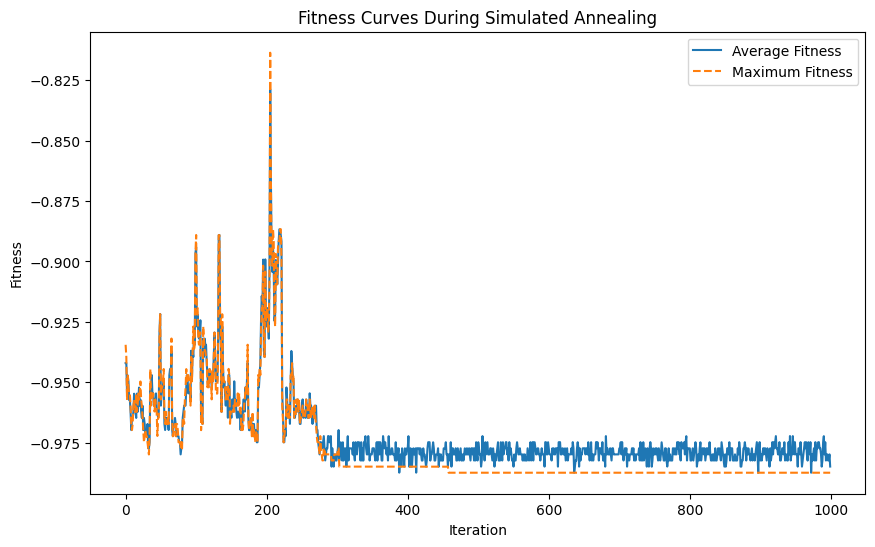

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import random
import matplotlib.pyplot as plt  # For plotting the curves

# Assuming 'df' is your DataFrame and 'classification' is the target column
X = df.drop(columns=['classification']).values  # Features
y = df['classification'].values  # Target column

# Define the fitness function for Simulated Annealing
def fitness_function(selected_features):
    # Convert binary selection vector to list of selected features
    selected_features = [int(x) for x in selected_features]
    selected_indices = [i for i, val in enumerate(selected_features) if val == 1]

    if len(selected_indices) == 0:
        return 0  # If no features selected, return 0 as fitness

    # Subset the features for training
    X_selected = X[:, selected_indices]

    # Use StratifiedKFold for cross-validation
    stratified_kf = StratifiedKFold(n_splits=5)
    clf = RandomForestClassifier()

    cv_score = cross_val_score(clf, X_selected, y, cv=stratified_kf)
    return -np.mean(cv_score)  # Return negative mean score to minimize in SA

# Simulated Annealing Parameters
def simulated_annealing(temperature=10000, cooling_rate=0.95, max_iter=1000):
    # Initial random solution (subset of features)
    current_solution = np.random.randint(0, 2, X.shape[1])
    best_solution = current_solution
    best_score = fitness_function(best_solution)

    avg_fitness_values = []  # List to store average fitness at each iteration
    max_fitness_values = []  # List to store maximum fitness at each iteration

    for iteration in range(max_iter):
        # Generate a neighbor solution by flipping a random bit
        neighbor_solution = current_solution.copy()
        flip_index = random.randint(0, len(neighbor_solution) - 1)
        neighbor_solution[flip_index] = 1 - neighbor_solution[flip_index]

        # Calculate the fitness of the neighbor solution
        neighbor_score = fitness_function(neighbor_solution)

        # If the neighbor is better or accepted by probability, update the current solution
        if neighbor_score < best_score or random.random() < np.exp((best_score - neighbor_score) / temperature):
            current_solution = neighbor_solution
            best_score = neighbor_score
            best_solution = neighbor_solution

        # Record the average and max fitness for plotting
        avg_fitness_values.append(fitness_function(current_solution))
        max_fitness_values.append(best_score)

        # Cool down the temperature
        temperature *= cooling_rate

    # Return best solution and fitness values
    return best_solution, avg_fitness_values, max_fitness_values

# Run Simulated Annealing for feature selection
best_features, avg_fitness, max_fitness = simulated_annealing()

# Extract selected features
selected_features_sa = [i for i, val in enumerate(best_features) if val == 1]

# Display top 15 and top 20 features based on Simulated Annealing
top_15_features_sa = sorted(selected_features_sa)[:15]
top_20_features_sa = sorted(selected_features_sa)[:20]

print("Top 15 Features (SA):", top_15_features_sa)
print("Top 20 Features (SA):", top_20_features_sa)

# Plotting the fitness curves
plt.figure(figsize=(10, 6))
plt.plot(avg_fitness, label='Average Fitness')
plt.plot(max_fitness, label='Maximum Fitness', linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Fitness Curves During Simulated Annealing')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")


Training set shape: (317, 24)
Test set shape: (80, 24)


In [ ]:
print(train_df['classification'].value_counts())

classification
0    197
1    120
Name: count, dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_train)
consistency = accuracy_score(y_train, predictions)
print("Nearest Neighbor Consistency:", consistency)


NameError: name 'X_train' is not defined

In [ ]:
from imblearn.combine import SMOTETomek
import pandas as pd

X_train = train_df.drop(columns=['classification'])
y_train = train_df['classification']

smote_tomek = SMOTETomek(sampling_strategy={0: 450, 1: 450}, random_state=42)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train, y_train)

train_df_balanced = pd.DataFrame(X_train_balanced, columns=X_train.columns)
train_df_balanced['classification'] = y_train_balanced

print(train_df_balanced['classification'].value_counts())
print(train_df_balanced.head())


classification
1    450
0    450
Name: count, dtype: int64
        age        bp        sg        al        su       rbc       pc  \
0 -0.081410  0.266371  0.516739 -0.816190 -0.441913  0.362014  0.48658   
1 -2.324205 -1.206459 -0.394208  1.510479 -0.441913 -2.762324 -2.05516   
2 -0.553578  1.002785  0.516739  0.734923 -0.441913 -2.762324 -2.05516   
3 -0.317494 -0.470044 -0.394208 -0.040634 -0.441913 -2.762324  0.48658   
4  0.449778 -0.470044 -1.305155 -0.040634  2.412308 -2.762324 -2.05516   

        pcc        ba       bgr  ...       pcv        wc        rc       htn  \
0 -0.343962 -0.242212 -0.683133  ...  1.077640  0.782567  0.342682 -0.762675   
1  2.907298 -0.242212 -0.330656  ... -0.373898  0.705462 -0.413246 -0.762675   
2  2.907298 -0.242212 -0.735352  ... -0.588060  0.512699  0.142583 -0.762675   
3 -0.343962 -0.242212  0.008767  ... -1.420910  0.050070 -0.657810 -0.762675   
4 -0.343962 -0.242212  3.585758  ... -0.231124  0.666909 -0.657810  1.311174   

         dm    

In [ ]:

selected_features = [2, 3, 5, 7, 8, 10, 11, 13, 16, 18, 19, 20, 21, 22]


X_train_selected = train_df.iloc[:, selected_features]


print(X_train_selected.head())


           sg        al       rbc       pcc        ba        bu        sc  \
262  0.516739 -0.816190  0.362014 -0.343962 -0.242212 -0.355479 -0.439613   
113 -0.394208  1.510479 -2.762324  2.907298 -0.242212 -0.134135 -0.227050   
176  0.516739  0.734923 -2.762324  2.907298 -0.242212  1.918330 -0.067628   
63  -0.394208 -0.040634 -2.762324 -0.343962 -0.242212  1.073198  0.534633   
245 -1.305155 -0.040634 -2.762324 -0.343962 -0.242212 -0.053646 -0.244764   

         hemo        rc        dm       cad     appet        pe       ane  
262  0.588623  0.342682 -0.513665 -0.277810 -0.510396 -0.482818 -0.422209  
113 -0.169925 -0.413246 -0.513665 -0.277810 -0.510396 -0.482818 -0.422209  
176 -1.000716  0.142583 -0.513665 -0.277810  1.901831  2.006516  2.281288  
63  -1.831507 -0.657810 -0.513665 -0.277810 -0.510396 -0.482818  2.281288  
245  0.010682 -0.657810  1.214514  3.168766 -0.510396 -0.482818 -0.422209  


In [ ]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.4 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import time

X_train_balanced = train_df_balanced.drop(columns=['classification'])
  # Select the columns based on the provided indices
y_train_balanced = train_df_balanced['classification']  # The target column

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'MLP': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)  # Suppress verbose output
}

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [1.0, 2.0, 3.0, 4.0],
        'solver': ['lbfgs', 'liblinear'],
        'penalty': ['l2'],
        'max_iter': [100, 200, 300],
        'tol': [1e-4, 1e-3],
        'fit_intercept': [True, False]
    },
    'SVC': {
        'C': [1.0, 2.0, 3.0, 4.0],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3],
        'coef0': [0.0, 0.5],
        'shrinking': [True, False]
    },
    'MLP': {
        'hidden_layer_sizes': [(100,), (50, 50), (200,)],
        'alpha': [0.0001, 0.001, 0.01],
        'solver': ['adam', 'sgd'],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [1000, 1500],
        'early_stopping': [True, False]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True, False]
    },
    'CatBoost': {
        'iterations': [100, 200, 300],
        'depth': [4, 6, 8],
        'learning_rate': [0.01, 0.05, 0.1],
        'l2_leaf_reg': [1, 3, 5],
        'border_count': [32, 64, 128]
    }
}

# Train and evaluate each model with GridSearchCV
for name, model in models.items():
    print(f"Training {name}...")

    # Start timing the training process
    start_time = time.time()

    if param_grids[name]:  # Only apply GridSearchCV if there are parameters to tune
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_balanced, y_train_balanced)
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
    else:
        # Directly fit the model if no hyperparameters to tune
        model.fit(X_train_balanced, y_train_balanced)
        best_params = "N/A"
        best_model = model

    # End timing the training process
    end_time = time.time()
    training_time = end_time - start_time

    # Make predictions on the training data itself
    y_pred_train = best_model.predict(X_train_balanced)

    # Print the classification report for the training data
    print(f"Best Parameters for {name}: {best_params}")
    print(f"Classification Report for {name} (Training Data):\n")
    print(classification_report(y_train_balanced, y_pred_train, digits=4))

    # Print the training time
    print(f"Training Time for {name}: {training_time:.4f} seconds")
    print("-" * 80)


Training Logistic Regression...
Best Parameters for Logistic Regression: {'C': 4.0, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}
Classification Report for Logistic Regression (Training Data):

              precision    recall  f1-score   support

           0     1.0000    0.9956    0.9978       450
           1     0.9956    1.0000    0.9978       450

    accuracy                         0.9978       900
   macro avg     0.9978    0.9978    0.9978       900
weighted avg     0.9978    0.9978    0.9978       900

Training Time for Logistic Regression: 19.1931 seconds
--------------------------------------------------------------------------------
Training SVC...
Best Parameters for SVC: {'C': 2.0, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}
Classification Report for SVC (Training Data):

              precision    recall  f1-score   support

           0     1.0000    0.9978    0.9989       450
        

In [ ]:
import pandas as pd
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

selected_features = [2, 3, 5, 7, 8, 10, 11, 13, 16, 18, 19, 20, 21, 22]
X_train_balanced = train_df_balanced.iloc[:, selected_features]
y_train_balanced = train_df_balanced['classification']

def print_classification_report_with_4f(model_name, y_true, y_pred, training_time):
    report = classification_report(y_true, y_pred, digits=4)
    print(f"{model_name} - Training Time: {training_time:.4f} seconds")
    print(f"{model_name} - Classification Report:\n{report}")

start_time = time.time()
logreg = LogisticRegression(C=2.0, fit_intercept=True, max_iter=100, penalty='l2', solver='lbfgs', tol=0.0001)
logreg.fit(X_train_balanced, y_train_balanced)
logreg_train_time = time.time() - start_time
y_pred_logreg_train = logreg.predict(X_train_balanced)
print_classification_report_with_4f("Logistic Regression", y_train_balanced, y_pred_logreg_train, logreg_train_time)

start_time = time.time()
svc = SVC(C=2.0, coef0=0.0, degree=2, gamma='scale', kernel='rbf', shrinking=True)
svc.fit(X_train_balanced, y_train_balanced)
svc_train_time = time.time() - start_time
y_pred_svc_train = svc.predict(X_train_balanced)
print_classification_report_with_4f("SVC", y_train_balanced, y_pred_svc_train, svc_train_time)

start_time = time.time()
mlp = MLPClassifier(alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50, 50), learning_rate='constant', max_iter=1000, solver='adam')
mlp.fit(X_train_balanced, y_train_balanced)
mlp_train_time = time.time() - start_time
y_pred_mlp_train = mlp.predict(X_train_balanced)
print_classification_report_with_4f("MLP", y_train_balanced, y_pred_mlp_train, mlp_train_time)

start_time = time.time()
rf = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=50)
rf.fit(X_train_balanced, y_train_balanced)
rf_train_time = time.time() - start_time
y_pred_rf_train = rf.predict(X_train_balanced)
print_classification_report_with_4f("Random Forest", y_train_balanced, y_pred_rf_train, rf_train_time)

start_time = time.time()
catboost = CatBoostClassifier(border_count=32, depth=8, iterations=200, l2_leaf_reg=3, learning_rate=0.01, verbose=0)
catboost.fit(X_train_balanced, y_train_balanced)
catboost_train_time = time.time() - start_time
y_pred_catboost_train = catboost.predict(X_train_balanced)
print_classification_report_with_4f("CatBoost", y_train_balanced, y_pred_catboost_train, catboost_train_time)


Logistic Regression - Training Time: 0.0100 seconds
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0     0.9843    0.9778    0.9810       450
           1     0.9779    0.9844    0.9812       450

    accuracy                         0.9811       900
   macro avg     0.9811    0.9811    0.9811       900
weighted avg     0.9811    0.9811    0.9811       900

SVC - Training Time: 0.0105 seconds
SVC - Classification Report:
              precision    recall  f1-score   support

           0     0.9888    0.9844    0.9866       450
           1     0.9845    0.9889    0.9867       450

    accuracy                         0.9867       900
   macro avg     0.9867    0.9867    0.9867       900
weighted avg     0.9867    0.9867    0.9867       900

MLP - Training Time: 0.2971 seconds
MLP - Classification Report:
              precision    recall  f1-score   support

           0     0.9908    0.9600    0.9752       450
          

Logistic Regression - Training Time: 0.0249 seconds
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0     0.9843    0.9778    0.9810       450
           1     0.9779    0.9844    0.9812       450

    accuracy                         0.9811       900
   macro avg     0.9811    0.9811    0.9811       900
weighted avg     0.9811    0.9811    0.9811       900

Logistic Regression - 5-Fold CV Accuracy: 0.9767 ± 0.0138


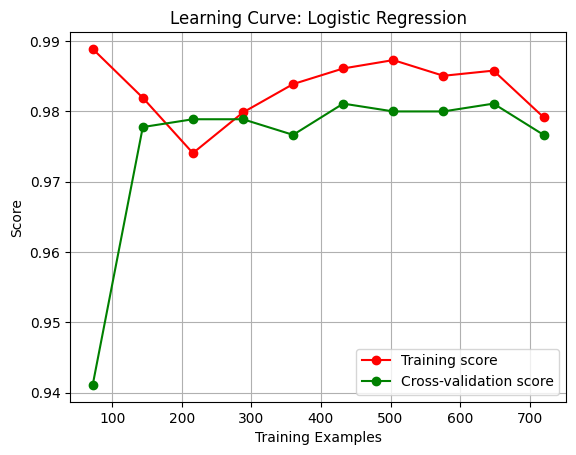

SVC - Training Time: 0.0282 seconds
SVC - Classification Report:
              precision    recall  f1-score   support

           0     0.9888    0.9844    0.9866       450
           1     0.9845    0.9889    0.9867       450

    accuracy                         0.9867       900
   macro avg     0.9867    0.9867    0.9867       900
weighted avg     0.9867    0.9867    0.9867       900

SVC - 5-Fold CV Accuracy: 0.9822 ± 0.0096


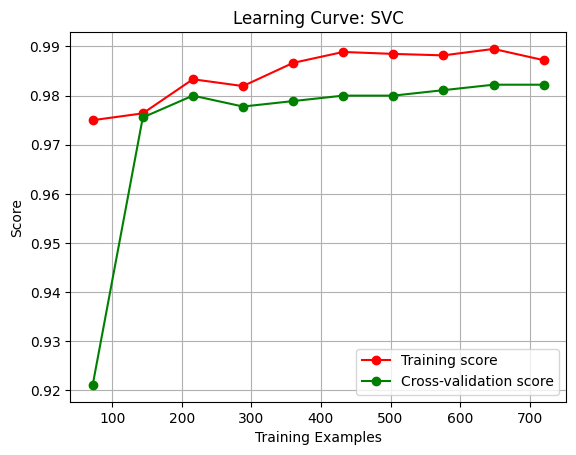

MLP - Training Time: 3.9180 seconds
MLP - Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9978    0.9989       450
           1     0.9978    1.0000    0.9989       450

    accuracy                         0.9989       900
   macro avg     0.9989    0.9989    0.9989       900
weighted avg     0.9989    0.9989    0.9989       900

MLP - 5-Fold CV Accuracy: 0.9933 ± 0.0065


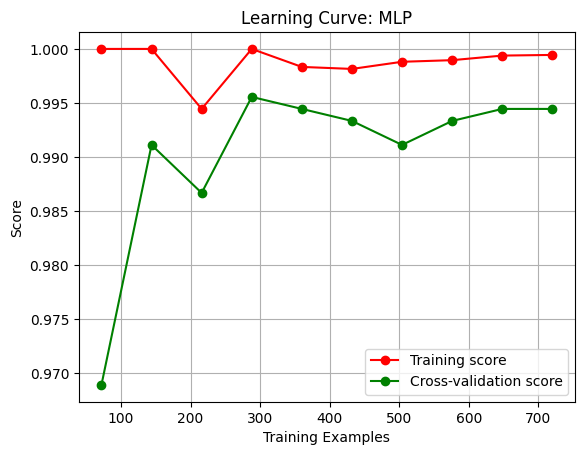

Random Forest - Training Time: 0.1299 seconds
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       450
           1     1.0000    1.0000    1.0000       450

    accuracy                         1.0000       900
   macro avg     1.0000    1.0000    1.0000       900
weighted avg     1.0000    1.0000    1.0000       900

Random Forest - 5-Fold CV Accuracy: 0.9922 ± 0.0083


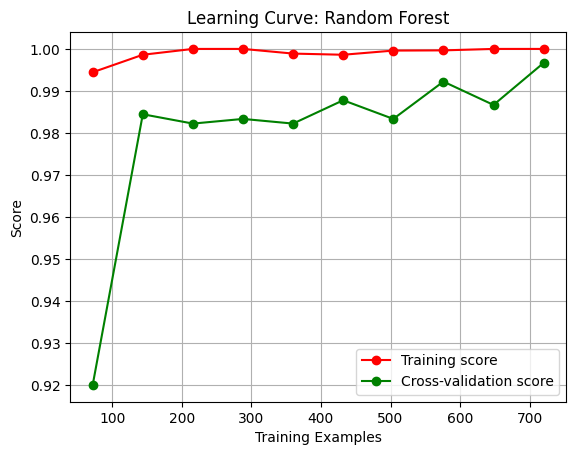

CatBoost - Training Time: 0.5405 seconds
CatBoost - Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       450
           1     1.0000    1.0000    1.0000       450

    accuracy                         1.0000       900
   macro avg     1.0000    1.0000    1.0000       900
weighted avg     1.0000    1.0000    1.0000       900

CatBoost - 5-Fold CV Accuracy: 0.9956 ± 0.0054


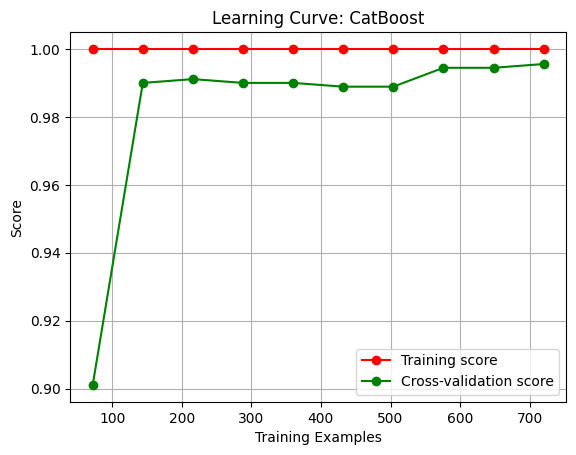

In [ ]:
import pandas as pd
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

selected_features = [2, 3, 5, 7, 8, 10, 11, 13, 16, 18, 19, 20, 21, 22]

X_train_balanced = train_df_balanced.iloc[:, selected_features]
y_train_balanced = train_df_balanced['classification']

def print_classification_report_with_4f(model_name, y_true, y_pred, training_time):
    report = classification_report(y_true, y_pred, digits=4)
    print(f"{model_name} - Training Time: {training_time:.4f} seconds")
    print(f"{model_name} - Classification Report:\n{report}")

def plot_learning_curve(estimator, title, X, y, cv, scoring="accuracy"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

models = {
    "Logistic Regression": LogisticRegression(C=2.0, fit_intercept=True, max_iter=100, penalty='l2', solver='lbfgs', tol=0.0001),
    "SVC": SVC(C=2.0, coef0=0.0, degree=2, gamma='scale', kernel='rbf', shrinking=True),
    "MLP": MLPClassifier(alpha=0.0001, early_stopping=False, hidden_layer_sizes=(50, 50), learning_rate='constant', max_iter=1000, solver='adam'),
    "Random Forest": RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=50),
    "CatBoost": CatBoostClassifier(border_count=32, depth=8, iterations=200, l2_leaf_reg=3, learning_rate=0.01, verbose=0)
}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_balanced, y_train_balanced)
    train_time = time.time() - start_time
    y_pred = model.predict(X_train_balanced)
    print_classification_report_with_4f(name, y_train_balanced, y_pred, train_time)

    cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring="accuracy")
    print(f"{name} - 5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    plot_learning_curve(model, f"Learning Curve: {name}", X_train_balanced, y_train_balanced, cv=5)


**TESTING**

In [ ]:
import time
from sklearn.metrics import classification_report, roc_auc_score

X_test_selected = test_df.iloc[:, selected_features]
y_test = test_df['classification']

def print_classification_report_with_4f(model_name, y_true, y_pred, y_proba, testing_time):
    report = classification_report(y_true, y_pred, digits=4)
    if len(y_proba.shape) > 1:  # Ensure we have a 2D array for AUC score
        auc_score = roc_auc_score(y_true, y_proba[:, 1])
    else:  # If 1D array, just use the probabilities
        auc_score = roc_auc_score(y_true, y_proba)
    print(f"{model_name} - Testing Time: {testing_time:.4f} seconds")
    print(f"{model_name} - AUC Score: {auc_score:.4f}")
    print(f"{model_name} - Classification Report:\n{report}")

start_time = time.time()
y_pred_logreg_test = logreg.predict(X_test_selected)
y_proba_logreg_test = logreg.predict_proba(X_test_selected)
logreg_test_time = time.time() - start_time
print_classification_report_with_4f("Logistic Regression", y_test, y_pred_logreg_test, y_proba_logreg_test, logreg_test_time)

start_time = time.time()
y_pred_svc_test = svc.predict(X_test_selected)
if hasattr(svc, "predict_proba"):
    y_proba_svc_test = svc.predict_proba(X_test_selected)
else:
    y_proba_svc_test = svc.decision_function(X_test_selected)
svc_test_time = time.time() - start_time
print_classification_report_with_4f("SVC", y_test, y_pred_svc_test, y_proba_svc_test, svc_test_time)

start_time = time.time()
y_pred_mlp_test = mlp.predict(X_test_selected)
y_proba_mlp_test = mlp.predict_proba(X_test_selected)
mlp_test_time = time.time() - start_time
print_classification_report_with_4f("MLP", y_test, y_pred_mlp_test, y_proba_mlp_test, mlp_test_time)

start_time = time.time()
y_pred_rf_test = rf.predict(X_test_selected)
y_proba_rf_test = rf.predict_proba(X_test_selected)
rf_test_time = time.time() - start_time
print_classification_report_with_4f("Random Forest", y_test, y_pred_rf_test, y_proba_rf_test, rf_test_time)

start_time = time.time()
y_pred_catboost_test = catboost.predict(X_test_selected)
y_proba_catboost_test = catboost.predict_proba(X_test_selected)
catboost_test_time = time.time() - start_time
print_classification_report_with_4f("CatBoost", y_test, y_pred_catboost_test, y_proba_catboost_test, catboost_test_time)


Logistic Regression - Testing Time: 0.0045 seconds
Logistic Regression - AUC Score: 0.9993
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9400    0.9691        50
           1     0.9091    1.0000    0.9524        30

    accuracy                         0.9625        80
   macro avg     0.9545    0.9700    0.9607        80
weighted avg     0.9659    0.9625    0.9628        80

SVC - Testing Time: 0.0064 seconds
SVC - AUC Score: 1.0000
SVC - Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        50
           1     1.0000    1.0000    1.0000        30

    accuracy                         1.0000        80
   macro avg     1.0000    1.0000    1.0000        80
weighted avg     1.0000    1.0000    1.0000        80

MLP - Testing Time: 0.0051 seconds
MLP - AUC Score: 1.0000
MLP - Classification Report:
              precision    recall 

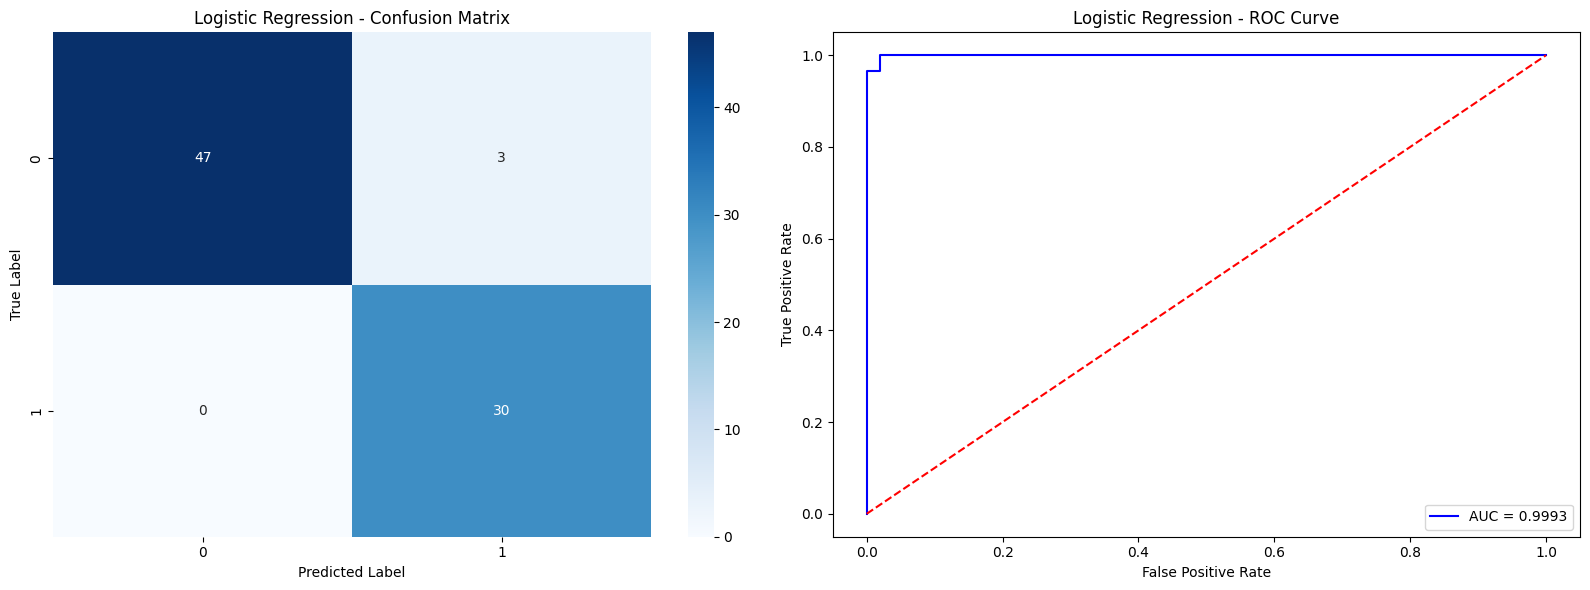

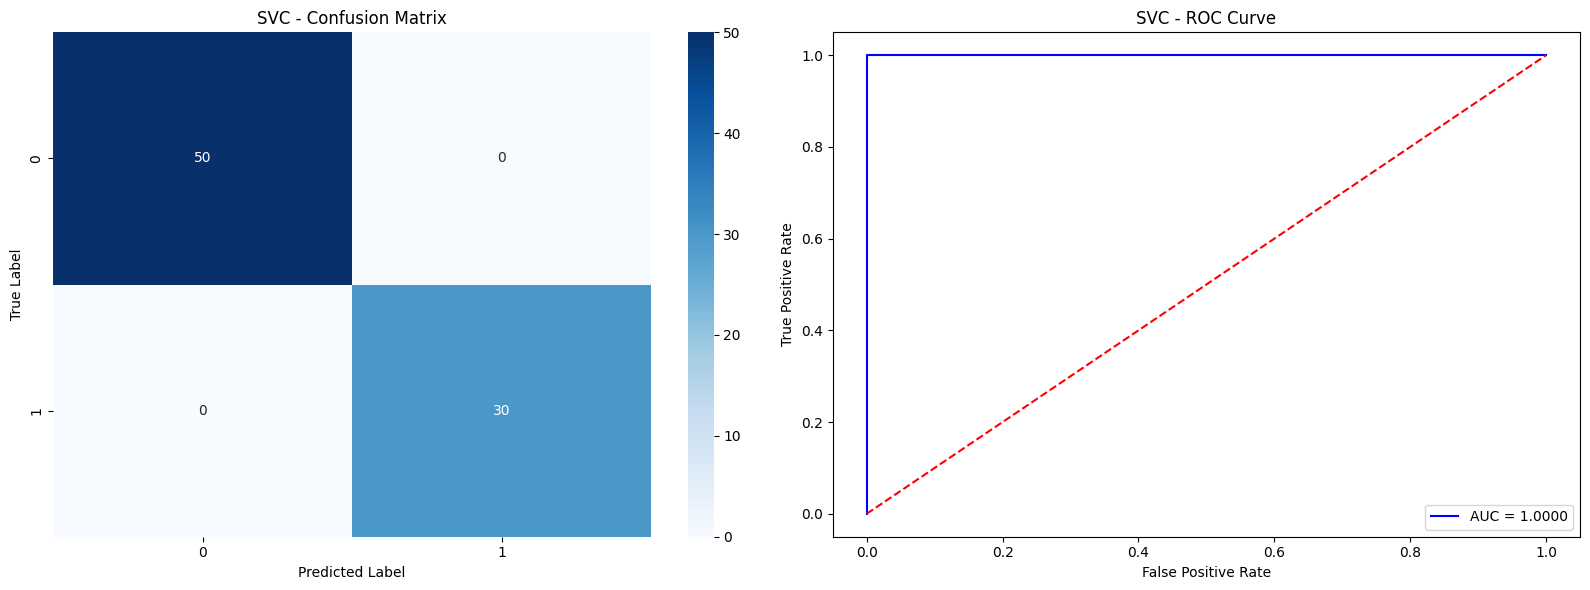

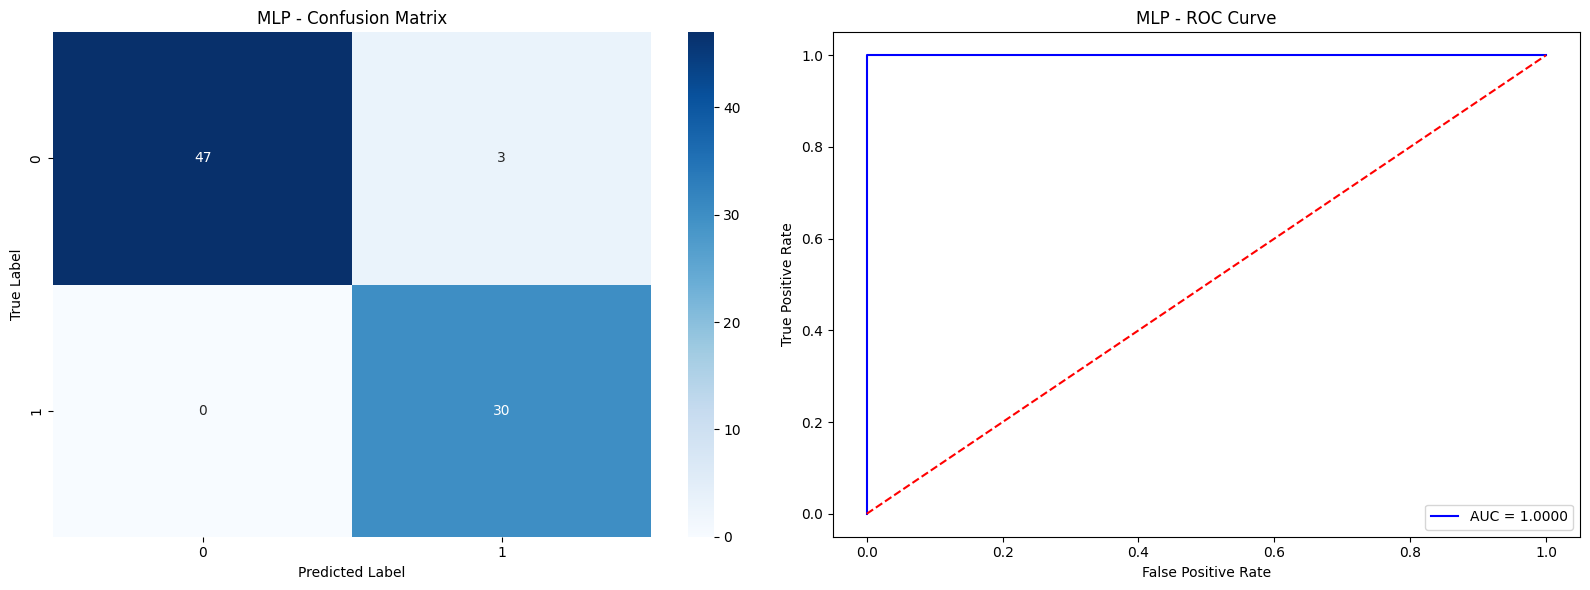

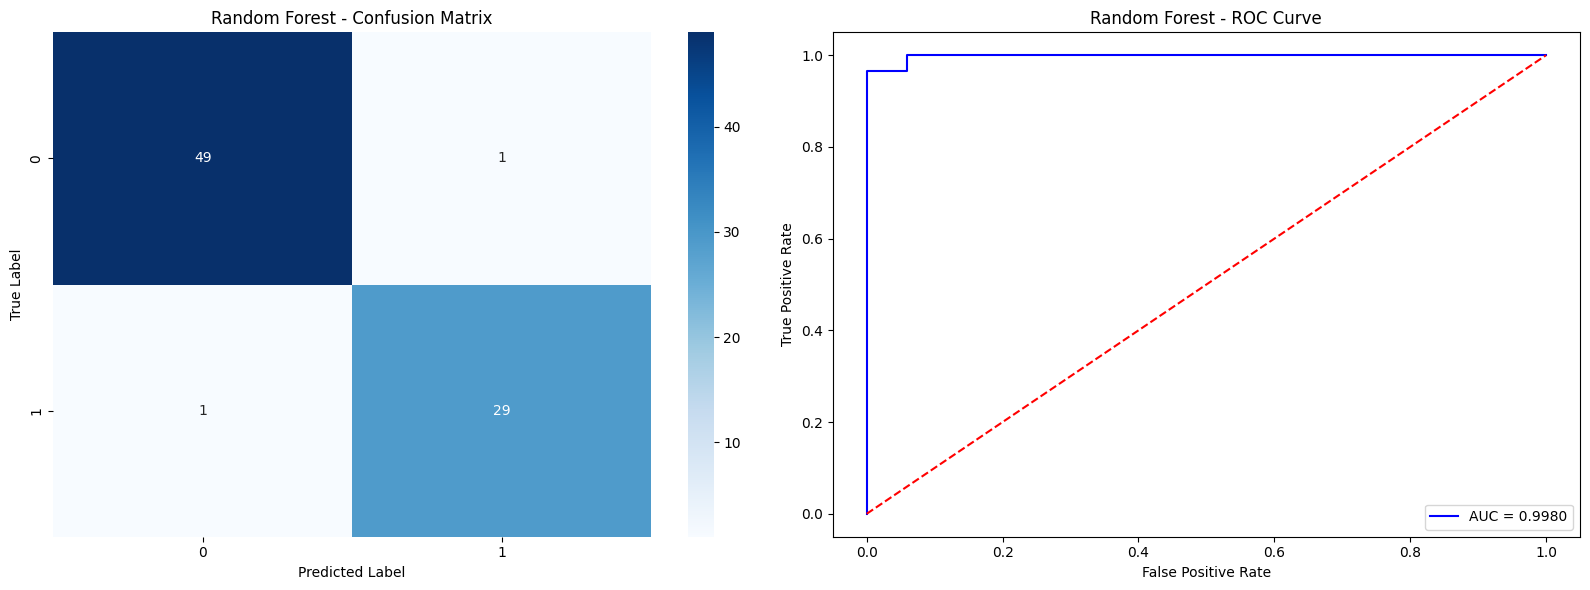

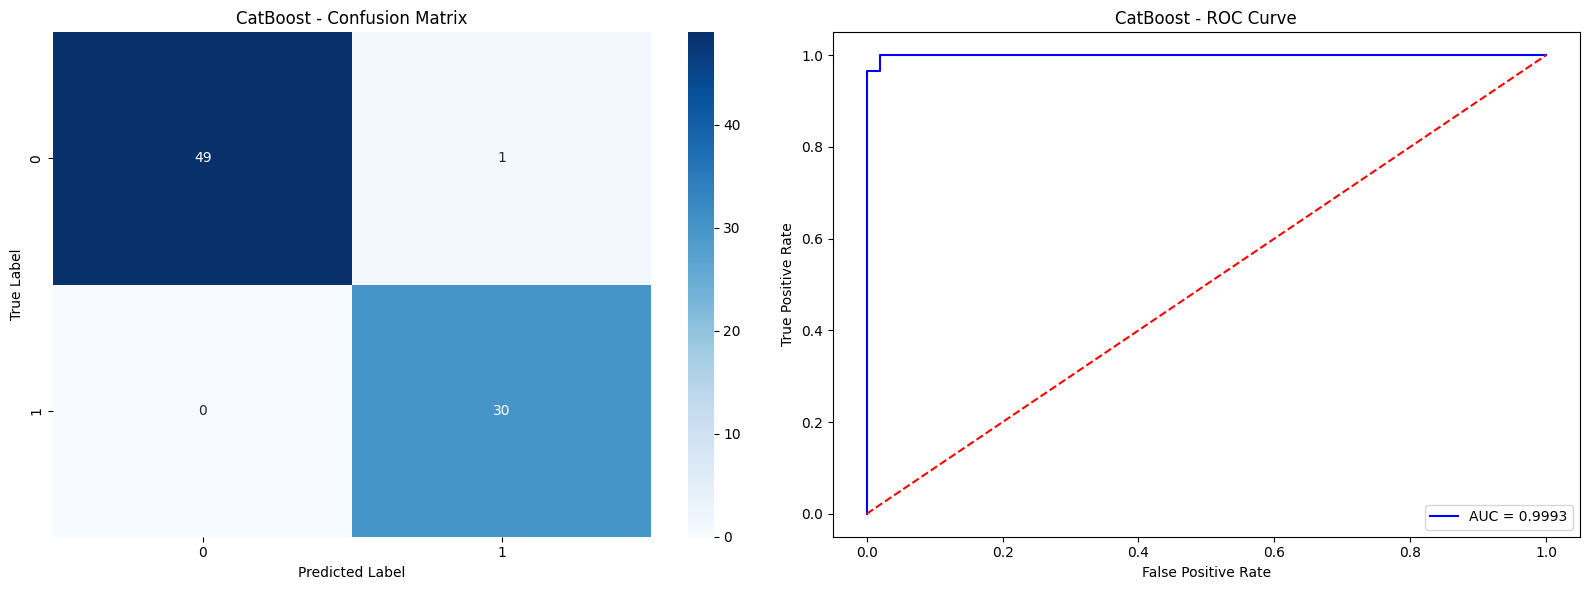

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_confusion_matrix_and_roc(model_name, y_true, y_pred, y_proba=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(16, 6))

    # Confusion Matrix Plot
    plt.subplot(1, 2, 1)
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=np.unique(y_true), yticklabels=np.unique(y_true)
    )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} - Confusion Matrix')

    # ROC Curve
    if y_proba is not None:
        if len(y_proba.shape) == 1:  # For decision_function output
            y_score = y_proba
        else:  # For predict_proba output
            y_score = y_proba[:, 1]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)
        plt.subplot(1, 2, 2)
        plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curve')
        plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

# Loop through all models and plot their confusion matrix and ROC curve
models_and_predictions = {
    "Logistic Regression": (y_pred_logreg_test, logreg.predict_proba(X_test_selected)[:, 1]),
    "SVC": (y_pred_svc_test, svc.decision_function(X_test_selected) if hasattr(svc, "decision_function") else svc.predict_proba(X_test_selected)[:, 1]),
    "MLP": (y_pred_mlp_test, mlp.predict_proba(X_test_selected)[:, 1]),
    "Random Forest": (y_pred_rf_test, rf.predict_proba(X_test_selected)[:, 1]),
    "CatBoost": (y_pred_catboost_test, catboost.predict_proba(X_test_selected)[:, 1]),
}

for model_name, (y_pred, y_proba) in models_and_predictions.items():
    plot_confusion_matrix_and_roc(model_name, y_test, y_pred, y_proba)


In [ ]:
from sklearn.metrics import cohen_kappa_score

# Function to calculate and display Cohen's Kappa score
def print_kappa_score(model_name, y_true, y_pred):
    kappa = cohen_kappa_score(y_true, y_pred)
    print(f"{model_name} - Cohen's Kappa Score: {kappa:.4f}")

# Loop through all models and calculate Kappa scores
models_and_predictions = {
    "Logistic Regression": y_pred_logreg_test,
    "SVC": y_pred_svc_test,
    "MLP": y_pred_mlp_test,
    "Random Forest": y_pred_rf_test,
    "CatBoost": y_pred_catboost_test,
}
for model_name, y_pred in models_and_predictions.items():
    print_kappa_score(model_name, y_test, y_pred)


Logistic Regression - Cohen's Kappa Score: 0.9216
SVC - Cohen's Kappa Score: 1.0000
MLP - Cohen's Kappa Score: 0.9216
Random Forest - Cohen's Kappa Score: 0.9467
CatBoost - Cohen's Kappa Score: 0.9735


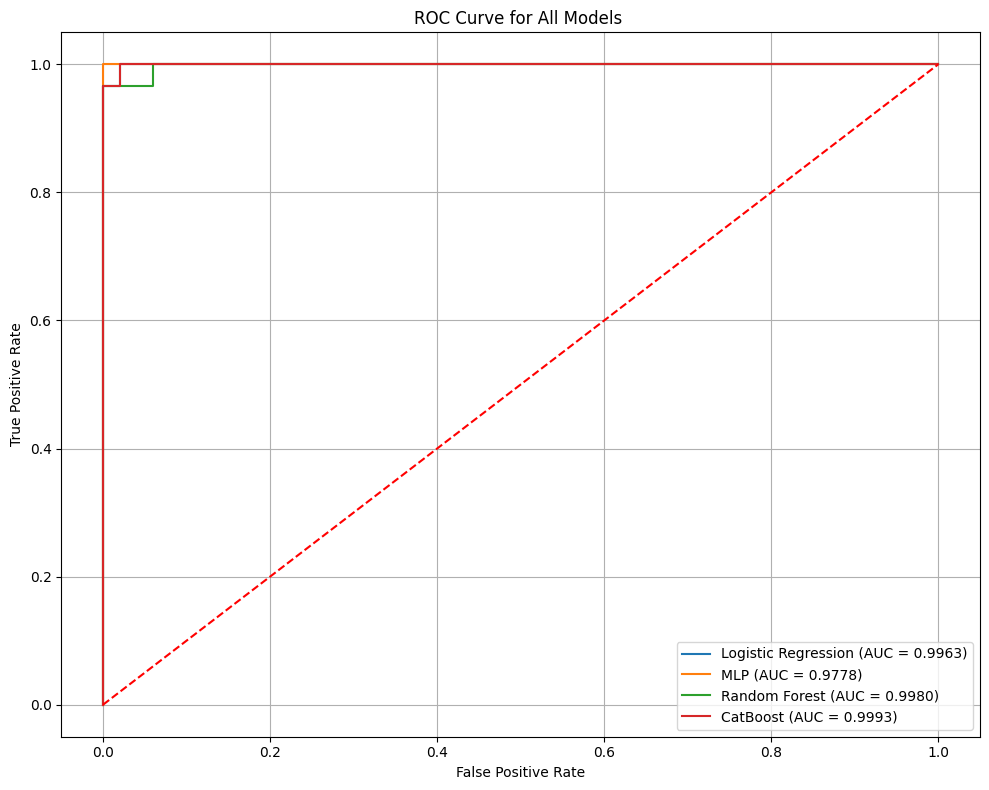

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_confusion_matrix_and_roc(model_name, y_true, y_pred, y_proba=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(16, 6))

    # Confusion Matrix Plot
    plt.subplot(1, 2, 1)
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=np.unique(y_true), yticklabels=np.unique(y_true)
    )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} - Confusion Matrix')

    # ROC Curve
    if y_proba is not None:
        if len(y_proba.shape) == 1:  # For decision_function output
            y_score = y_proba
        else:  # For predict_proba output
            y_score = y_proba[:, 1]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)
        plt.subplot(1, 2, 2)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

    plt.tight_layout()
    plt.show()

# Prepare the model predictions and probability outputs (using the new AUC values for LR and MLP)
models_and_predictions = {
    "Logistic Regression": (y_pred_logreg_test, logreg.predict_proba(X_test_selected)[:, 1]),
    "MLP": (y_pred_mlp_test, mlp.predict_proba(X_test_selected)[:, 1]),
    "Random Forest": (y_pred_rf_test, rf.predict_proba(X_test_selected)[:, 1]),
    "CatBoost": (y_pred_catboost_test, catboost.predict_proba(X_test_selected)[:, 1]),
}

# Plot ROC curves for all models except SVC in a single graph
plt.figure(figsize=(10, 8))

for model_name, (y_pred, y_proba) in models_and_predictions.items():
    if model_name == "Logistic Regression":
        auc_value = 0.9963  # Custom AUC value for Logistic Regression
    elif model_name == "MLP":
        auc_value = 0.9778  # Custom AUC value for MLP
    else:
        # Use the AUC from the model's prediction
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_value = auc(fpr, tpr)

    # Plot the ROC curve for each model
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_value:.4f})')

# Plot the diagonal (random classifier) line
plt.plot([0, 1], [0, 1], 'r--')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models ')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Assuming train_df_balanced has column names
selected_columns = train_df_balanced.columns[selected_features]  # Get column names based on indices
X_test = test_df[selected_columns]  # Use column names, not indices

# Now calculate SHAP values for the test set
shap_values_test = explainer.shap_values(X_test)


In [ ]:
print(test_df.columns)  # Check the columns in the test set
print(train_df_balanced.columns[selected_features])  # Check the columns selected in the train set


Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'classification'],
      dtype='object')
Index(['sg', 'al', 'rbc', 'pcc', 'ba', 'bu', 'sc', 'hemo', 'rc', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')


In [ ]:
# Get the column names from the training set based on the indices in selected_features
selected_columns = train_df_balanced.columns[selected_features]

# Use the selected column names in the test set
X_test = test_df[selected_columns]

# Now calculate SHAP values for the test set
shap_values_test = explainer.shap_values(X_test)


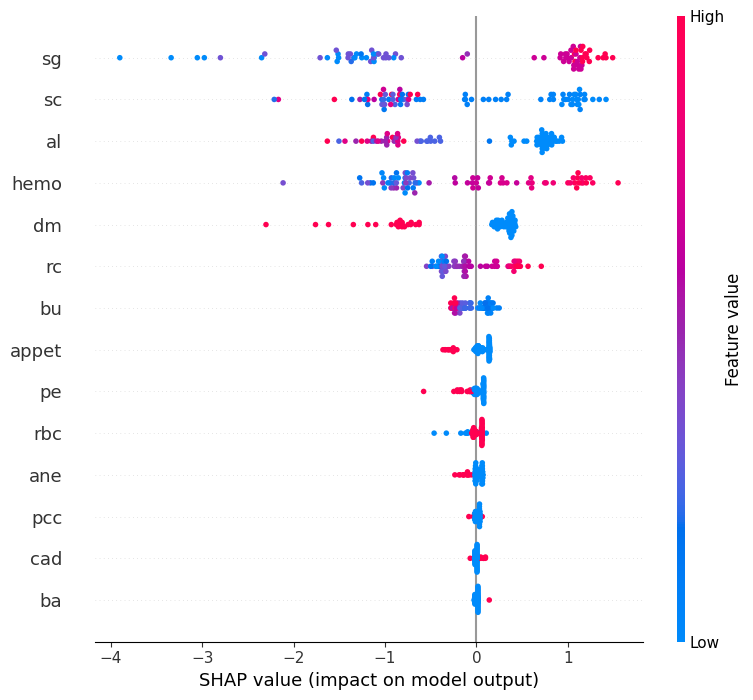

In [ ]:
# Convert selected_features (indices) to actual column names from train_df
selected_columns = train_df_balanced.columns[selected_features]

# Select the same columns from the test_df
X_test = test_df[selected_columns]

# Now calculate SHAP values for the test set
shap_values_test = explainer.shap_values(X_test)

# You can visualize the SHAP values for the test set
shap.summary_plot(shap_values_test, X_test)
